In [26]:
# importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D, Dropout
from tensorflow.keras import regularizers
# data preprocessing
from keras.utils import to_categorical

In [27]:
import sys

# Check if running in Colab
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
else:
    print("Not running in Google Colab. Mounting Google Drive is not supported.")


Not running in Google Colab. Mounting Google Drive is not supported.


In [28]:
# load the dataset and split, normalize it
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [29]:
# checking data structure
print(x_train.shape)
print(x_test.shape)
     

(60000, 28, 28)
(10000, 28, 28)


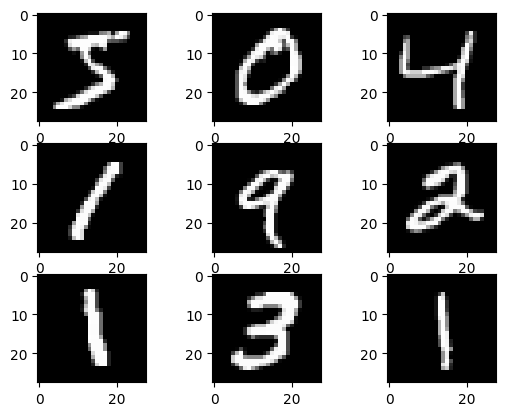

In [30]:
# plot first few images
for i in range(9):
 plt.subplot(3,3,1 + i)
 plt.imshow(x_train[i], cmap=plt.get_cmap('gray')) 
plt.show()

In [31]:
# print first 15 training labels
print('Integer-valued labels: ')
print(y_train[:15])

Integer-valued labels: 
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


In [32]:
# one-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print('One-hot labels: ')
print(y_train[:15])

One-hot labels: 
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [33]:
# Hyperparameters
n_epochs = 15
batch_size_t = 32

In [34]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28,28,1), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 10)                62730     
                                                                 
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
_________________________________________________________________


In [35]:
# compile and run
model.compile(optimizer='Adam', loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=n_epochs, batch_size=32, validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2645 - accuracy: 0.9221 - val_loss: 0.1222 - val_accuracy: 0.9657
Epoch 2/15
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0946 - accuracy: 0.9726 - val_loss: 0.0822 - val_accuracy: 0.9756
Epoch 3/15
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0672 - accuracy: 0.9802 - val_loss: 0.0759 - val_accuracy: 0.9775
Epoch 4/15
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0554 - accuracy: 0.9836 - val_loss: 0.0668 - val_accuracy: 0.9815
Epoch 5/15
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0459 - accuracy: 0.9861 - val_loss: 0.0640 - val_accuracy: 0.9805
Epoch 6/15
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0396 - accuracy: 0.9881 - val_loss: 0.0657 - val_accuracy: 0.9796
Epoch 7/15
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0330 - accuracy: 0.9900 - val_loss: 0.0634 - val

Text(0.5, 0.98, 'CNN - Conv2D + MaxPooling')

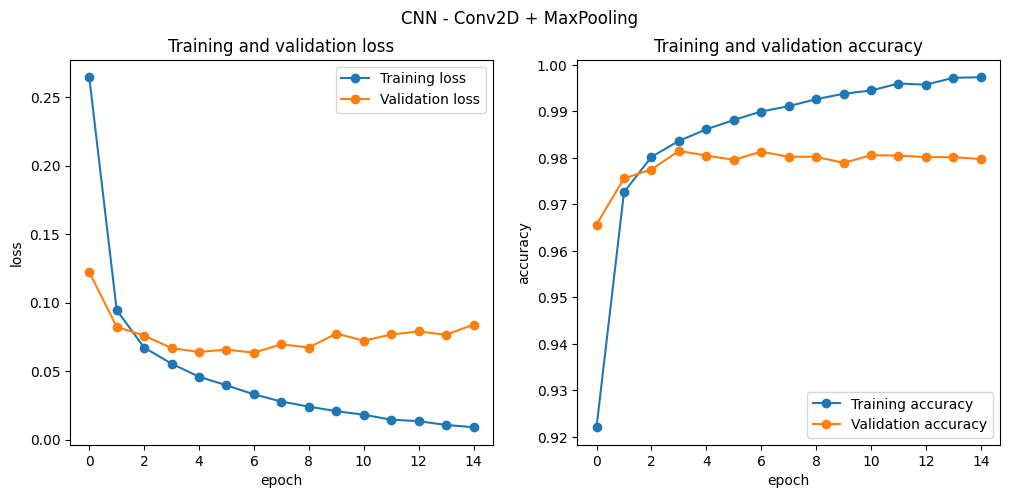

In [36]:
# training and validation loss
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))            # f is the figure name, (two subplots) = ........(one row, two col of subplots, (12 inch wide and 5 inch high))
ax1.plot(history.history['loss'],'-o', label='Training loss')
ax1.plot(history.history['val_loss'],'-o', label='Validation loss')
ax1.set_title('Training and validation loss')
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.legend(loc='upper right')

ax2.plot(history.history['accuracy'],'-o', label='Training accuracy')
ax2.plot(history.history['val_accuracy'],'-o', label='Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.legend(loc='lower right')
f.suptitle('CNN - Conv2D + MaxPooling')

In [37]:
# evaluate test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]
print('Test accuracy %.2f%%' % accuracy)

Test accuracy 98.17%


### Other improvements

You can try a combination of model architectural parameters and training parameters to keep improving your model.

#### Model improvements:

kernel initializer and kernel regularizer
MaxPooling2D pool_size
Dropout
Batch normalization
Training hyperparameters:

batch size and number of epochs
validation split
callbacks, including model checkpoint


In [56]:
from numpy import asarray
from numpy import argmax
import random

# Get a random index within the range of the test dataset
random_index = random.randint(0, len(x_test) - 1)

image = x_test[random_index]
yhat = model.predict(asarray([image]))
print("Index:", random_index )

print('Predicted values: ', yhat)
print('\nPredicted: class = %d' % argmax(yhat))
print('True class: ', np.argmax(y_test[random_index]))

1/1 [==============================] - 0s 24ms/step


Index: 8200
Predicted values:  [[9.1958965e-14 5.9925270e-19 6.2941943e-11 1.7398404e-09 3.3636407e-14
  7.2802777e-07 9.9999928e-01 5.5079097e-27 1.6554966e-13 5.1875913e-16]]

Predicted: class = 6
True class:  6


313/313 [==============================] - 1s 3ms/step


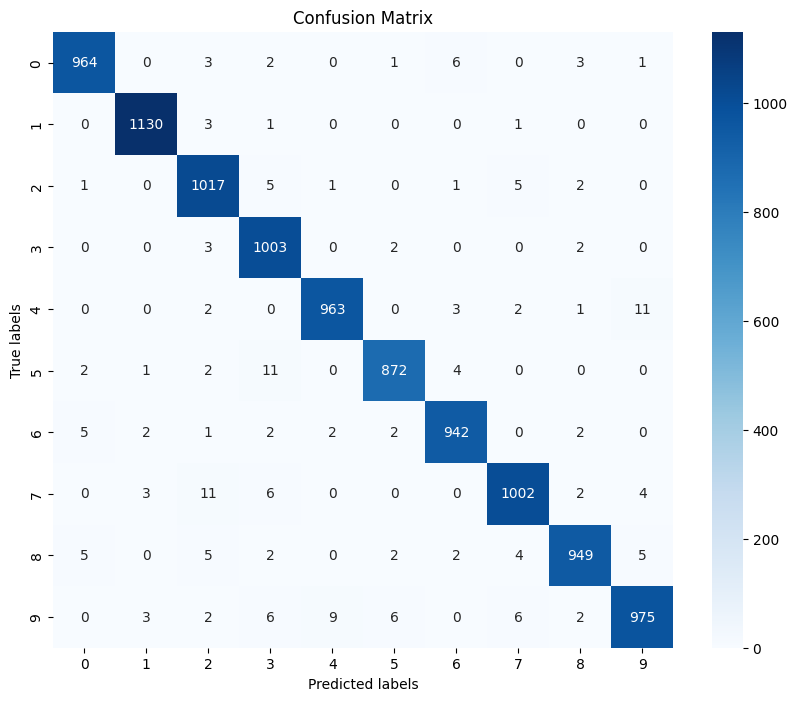

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np

predictions = model.predict(x_test)
confusion_matrix = tf.math.confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [60]:
# checking all layers present in the model
for layer in model.layers:
    print(layer.name) 

conv2d
max_pooling2d
flatten
dense


In [84]:
# Summarize filter shapes / kernels
for layer in model.layers:
    if isinstance(layer, Conv2D):                            #check if the layer is instance of conv2d class
        filters, biases = layer.get_weights()           # retrieve the weights of the layer, which include the filters
        print(layer.name, filters.shape, biases.shape)


conv2d (3, 3, 1, 32) (32,)


In [64]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# This normalization process is common when visualizing filter weights in convolutional neural networks to ensure that the visualization is consistent and informative.

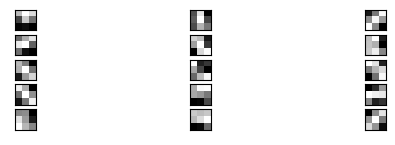

In [83]:
from matplotlib import pyplot

# plot first few filters
n_filters, ix = 15, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]                                   #extracts the ith filter from the filters array.
	# plot each channel separately
	for j in range(1):
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()
     

In [85]:
from keras.models import Model

# layer_outputs should match the number of Conv2D and MaxPooling2D blocks in the model
layer_outputs = [layer.output for layer in model.layers[0:4]]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

#After creating activation_model, you can use it to obtain the activations of specific layers in your original model by passing input data to it.
#these are useful for visualizing the intermediate representations learned by the model

In [86]:
layer_outputs

[<KerasTensor: shape=(None, 28, 28, 32) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 14, 14, 32) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 6272) dtype=float32 (created by layer 'flatten')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>]

In [87]:
activation_model.summary()

Model: "model_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 10)                62730     
                                                                 
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
______________________________________________________

(-0.5, 27.5, 27.5, -0.5)

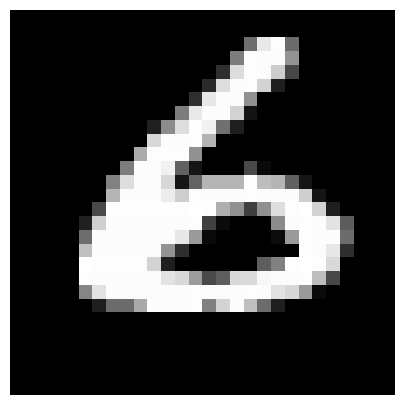

In [108]:

img = x_test[random_index].reshape(1,28,28,1)
fig = plt.figure(figsize=(5,5))
plt.imshow(img[0,:,:,0],cmap="gray")
plt.axis('off')

In [109]:
activations = activation_model.predict(img)


1/1 [==============================] - 0s 60ms/step


In [110]:

len(activations)

4

In [111]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [112]:
def plt_images(x_test, i_max, j_max):

  fig, axs = plt.subplots(i_max, j_max, figsize=plt.figaspect(0.5))
  for i in range(i_max):
    for j in range(j_max):
      ind = np.arange(i_max*j_max)[i*j_max+j]
      img = x_test[ind].reshape(1,28,28,1)
      axs[i, j].imshow(img[0,:,:,0], aspect='auto')

  return

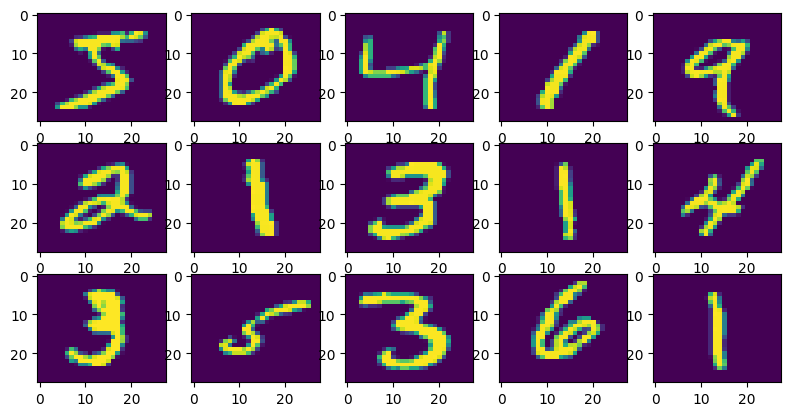

In [113]:
i_max = 3
j_max = 5
plt_images(x_train, i_max, j_max)

In [114]:
def plot_gradcam_images(i_max, j_max, x_test, model, layer_name):
  fig, axs = plt.subplots(i_max, j_max, figsize=plt.figaspect(0.5))
  for i in range(i_max):
    for j in range(j_max):
      ind = np.arange(i_max*j_max)[i*j_max+j]
      heatmap = make_gradcam_heatmap(tf.expand_dims(x_test[ind], axis=0), model, layer_name)
      axs[i, j].matshow(heatmap, aspect='auto')
  plt.tight_layout()
  plt.show()
  return

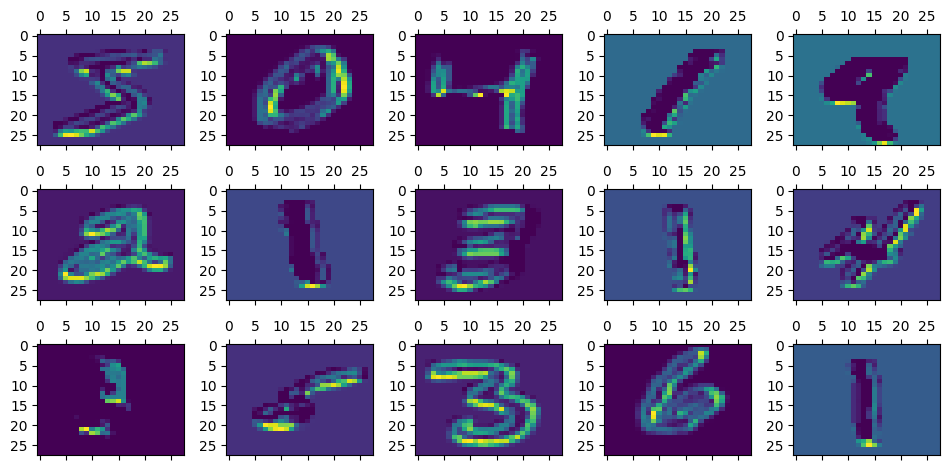

In [115]:

plot_gradcam_images(i_max, j_max, x_train, model, 'conv2d')

In [116]:

plot_gradcam_images(i_max, j_max, x_train, model, 'max_pooling2d')